# **Exploratory Data Analysis (EDA) - Etablissements** #

In [1]:
import pandas as pd
import numpy as np


## **ETABLISSEMENTS** ##

CODGEO : ID géographique de la ville  
LIBGEO : nom de la ville  
REG : numéro de région  
DEP : numéro de département  
E14TST : nombre total d'entreprises dans la ville  
E14TS0ND : nombre d'entreprises de taille inconnue ou nulle dans la ville  
E14TS1 : nombre d'entreprises de 1 à 5 employés dans la ville  
E14TS6 : nombre d'entreprises de 6 à 9 employés dans la ville  
E14TS10 : nombre d'entreprises de 10 à 19 employés dans la ville  
E14TS20 : nombre d'entreprises de 20 à 49 employés dans la ville  
E14TS50 : nombre d'entreprises de 50 à 99 employés dans la ville  
E14TS100 :  nombre d'entreprises de 100 à 199 employés dans la ville  
E14TS200 : nombre d'entreprises de 200 à 499 employés dans la ville  
E14TS500 : nombre d'entreprises de plus de 500 employés dans la ville  

### Création du dataframe ets ###

In [2]:
ets = pd.read_csv('./data/base_etablissement_par_tranche_effectif.csv')
ets.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


### Combien de lignes ? ###

In [3]:
#Combien de lignes?
print('Nombre de lignes : {}'.format(len(ets)))

Nombre de lignes : 36681


### Des doublons ? ###

In [4]:
#Doublons?
ets.duplicated().value_counts()

False    36681
dtype: int64

### Création d'un dataframe ets_numbers pour exploration des valeurs numériques ###

In [5]:
ets_numbers = ets.select_dtypes(include='number')

#CODGEO, LIBGEO et DEP ne sont pas des colonnes à variables numériques
ets_numbers.head()

,REG,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,82,25,22,1,2,0,0,0,0,0,0
1,82,10,9,1,0,0,0,0,0,0,0
2,82,996,577,272,63,46,24,9,3,2,0
3,82,99,73,20,3,1,2,0,0,0,0
4,82,4,4,0,0,0,0,0,0,0,0


In [6]:
#Toutes les colonnes numériques sont des integers
ets_numbers.dtypes

REG         int64
E14TST      int64
E14TS0ND    int64
E14TS1      int64
E14TS6      int64
E14TS10     int64
E14TS20     int64
E14TS50     int64
E14TS100    int64
E14TS200    int64
E14TS500    int64
dtype: object

In [7]:
#Des NaN dans ces colonnes numériques ? NON
ets_numbers.isna().sum()

REG         0
E14TST      0
E14TS0ND    0
E14TS1      0
E14TS6      0
E14TS10     0
E14TS20     0
E14TS50     0
E14TS100    0
E14TS200    0
E14TS500    0
dtype: int64

In [8]:
#pour les colonnes avec le nombre d'établissements, est-ce que les min et max sont cohérents?
for i in ets_numbers.columns[1:]:
  print('Colonne {} : min = {} / max = {}'.format(i, ets_numbers[i].min(), ets_numbers[i].max()))

Colonne E14TST : min = 0 / max = 427385
Colonne E14TS0ND : min = 0 / max = 316603
Colonne E14TS1 : min = 0 / max = 76368
Colonne E14TS6 : min = 0 / max = 14836
Colonne E14TS10 : min = 0 / max = 10829
Colonne E14TS20 : min = 0 / max = 5643
Colonne E14TS50 : min = 0 / max = 1658
Colonne E14TS100 : min = 0 / max = 812
Colonne E14TS200 : min = 0 / max = 456
Colonne E14TS500 : min = 0 / max = 180


In [9]:
#Quel est le poids de E14TS0ND (nombre d'entreprises de taille inconnue ou nulle dans la ville) dans le dataset?

#Nombre d'entreprises de taille inconnue ou nulle
E14TS0ND = ets.E14TS0ND.sum()
print('Nombre d\'entreprises de taille inconnue ou nulle : {}'.format(E14TS0ND))

ets_taille_connue = ets_numbers.drop(['REG', 'E14TS0ND', 'E14TST'], axis=1)

total_ets_avec_taille = 0
for i in ets_taille_connue.columns:
  total_ets_avec_taille += ets_taille_connue[i].sum()

print('Nombre d\'entreprises avec taille connue : {}'.format(total_ets_avec_taille))
print('Proportion d\'entreprises avec taille inconnue ou nulle : {}%'.format(np.round(E14TS0ND / (E14TS0ND + total_ets_avec_taille) * 100),1))
print('Nombre total d\'entreprises : {}'.format(E14TS0ND + total_ets_avec_taille))

Nombre d'entreprises de taille inconnue ou nulle : 3064892
Nombre d'entreprises avec taille connue : 1463600
Proportion d'entreprises avec taille inconnue ou nulle : 68.0%
Nombre total d'entreprises : 4528492


### Colonne REG (Régions) : Combien de valeurs uniques ? #

In [10]:
# Combien de valeurs uniques dans REG ?
print(len(np.unique(ets_numbers.REG)))

27


In [11]:
ets_numbers.REG.value_counts(dropna=False)

73    3020
82    2874
41    2338
72    2296
22    2291
26    2046
21    1953
24    1841
25    1812
43    1785
91    1545
31    1545
52    1496
54    1460
23    1420
83    1310
11    1281
53    1270
93     958
42     904
74     747
94     360
2       34
1       32
4       24
3       22
6       17
Name: REG, dtype: int64

### Colonne DEP : Des valeurs non numériques ? Le 0 des 9 premiers DEP conservé ? Combien de DEP ?

In [12]:
#Quelles sont les valeurs non numériques dans DEP ?
DEP_no_numbers = []

for i in ets.DEP:
  try:
    int(i)
  except:
    DEP_no_numbers.append(i)

#Départements de la Corse
print(np.unique(DEP_no_numbers))

['2A' '2B']


In [13]:
#Est-ce que les 0 sont bien présents dans les DPT 01,02,etc.? --> OUI
ets[ets.DEP.isin(['01','02','03','04','05','06','07','08','09','10'])].DEP.value_counts(dropna=False).sort_index()

01    419
02    816
03    320
04    200
05    172
06    163
07    339
08    463
09    332
10    433
Name: DEP, dtype: int64

In [14]:
#Combien de départements ?
print(len(np.unique(ets.DEP)))

101


### Création d'un dataframe pour l'exploration des objets (DEP excl.) ###

In [15]:
#Vérification des valeurs 'string' dans CODGEO et LIBGEO
#Création d'un dataframe pour ces deux colonnes
ets_string = ets.select_dtypes(include='object').drop(['DEP'], axis=1)
ets_string.head()

,CODGEO,LIBGEO
0,01001,L'Abergement-Clémenciat
1,01002,L'Abergement-de-Varey
2,01004,Ambérieu-en-Bugey
3,01005,Ambérieux-en-Dombes
4,01006,Ambléon


In [16]:
ets_string.CODGEO.value_counts(dropna=False)

01001    1
61076    1
61070    1
61071    1
61072    1
        ..
31358    1
31357    1
31356    1
31355    1
97617    1
Name: CODGEO, Length: 36681, dtype: int64

In [17]:
#est-ce qu'il y a des NaN ?
ets_string.isna().sum()

CODGEO    0
LIBGEO    0
dtype: int64

In [18]:
#Est-ce que chaque CODGEO est unique ?
print(len(np.unique(ets_string.CODGEO)) == len(ets_string))

True


In [19]:
#Dans LIBGEO ?
print(len(np.unique(ets_string.LIBGEO)) == len(ets_string))

False


In [20]:
print(len(np.unique(ets_string.LIBGEO)))

34142


### Colonne LIBGEO : Des valeurs non uniques ? ###

In [21]:
#Certains libellés LIBGEO sont identiques. Lesquels ?
count_libgeo = pd.DataFrame(ets_string.groupby(['LIBGEO']).size().reset_index().rename(columns={0: "count"})).sort_values(by='count', ascending=False)
count_libgeo.head(5)                         

,LIBGEO,count
28434,Sainte-Colombe,14
27969,Saint-Sauveur,12
2403,Beaulieu,11
28561,Sainte-Marie,11
15883,Le Pin,10


In [22]:
#Exemple de la diversité des CODGEO pour Sainte-Colombe
ets_string[ets_string['LIBGEO'] == 'Sainte-Colombe']

,CODGEO,LIBGEO
1879,05135,Sainte-Colombe
5779,16309,Sainte-Colombe
6198,17319,Sainte-Colombe
7472,21544,Sainte-Colombe
9311,25515,Sainte-Colombe
13301,33390,Sainte-Colombe
14059,35262,Sainte-Colombe
16007,40252,Sainte-Colombe
17782,46260,Sainte-Colombe
19147,50457,Sainte-Colombe


In [23]:
#est-ce qu'il y des caractère spéciaux?

spec_car = ['!', '?', "/", ',', ';']
spec_car_return = []
for i in ets_string.LIBGEO:
    for j in spec_car:
        if j in i:
            spec_car_return.append(j)

print(np.unique(spec_car_return))

[]


# Exploration Visuelle #

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

## Questions ##

- Quelle est la distribution du nombre d'entreprise par département ?

### Distribution du nombre d'entreprise par région ###

In [25]:
reg_total_ets = ets.groupby('REG', as_index=False).agg(Total_ets = ('E14TST', 'sum')).sort_values(by='Total_ets', ascending=False)
reg_total_ets.head()

,REG,Total_ets
5,11,1048252
22,82,464837
25,93,462972
19,72,242590
24,91,218718


In [26]:
len(reg_total_ets)

27

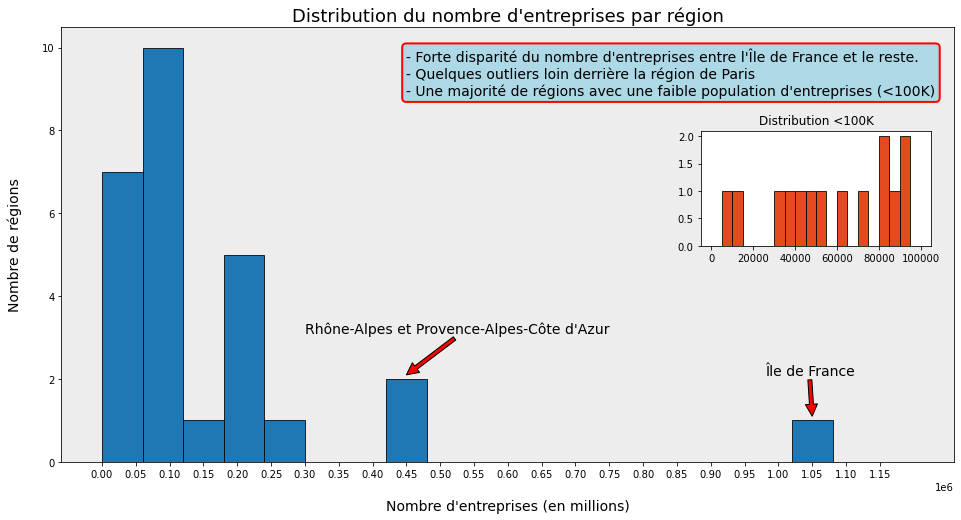

In [27]:
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)
ax.hist(reg_total_ets.Total_ets, range=(0,1200000),bins=20, edgecolor='black', linewidth=0.8)
ax.set_ylabel('Nombre de régions', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en millions)', labelpad=20, fontsize=14)
ax.set_title('Distribution du nombre d\'entreprises par région', fontsize=18)
t = ax.annotate(text='Île de France', xy=(1050000, 1.1), xytext=(980000,2.1), arrowprops={'facecolor':'red'}), ax.annotate(text='Rhône-Alpes et Provence-Alpes-Côte d\'Azur', xy=(450000,2.1), xytext=(300000,3.1), arrowprops={'facecolor':'red'})
t2 = ax.text(s='- Forte disparité du nombre d\'entreprises entre l\'Île de France et le reste. \n- Quelques outliers loin derrière la région de Paris \n- Une majorité de régions avec une faible population d\'entreprises (<100K)', x=450000, y=10, ha="left", va="top", size=15, bbox=dict(boxstyle="round,pad=0.3",fc="lightblue", ec="red", lw=2))
plt.setp(t, fontsize=14)
plt.setp(t2, fontsize=14)
ax.grid(visible=False)
ax.set_facecolor('#ededed')
ax.set_xticks(np.arange(0,1200000,50000))

ax2 = plt.axes([0.68, 0.50, 0.2, 0.2])
ax2.hist(reg_total_ets.Total_ets, range=(0,100000), bins=20, edgecolor='black', linewidth=0.8, color='#E54920')
ax2.set_title('Distribution <100K')
ax2.text(s='', x=0, y=1.5)
plt.show()

plt.show()


### Distribution du nombre d'entreprise par département ###

In [28]:
dep_total_ets = ets.groupby('DEP', as_index=False).agg(Total_ets = ('E14TST', 'sum')).sort_values(by='Total_ets', ascending=False)
dep_total_ets.head()

,DEP,Total_ets
75,75,427385
12,13,164883
69,69,136867
92,92,131528
59,59,129819


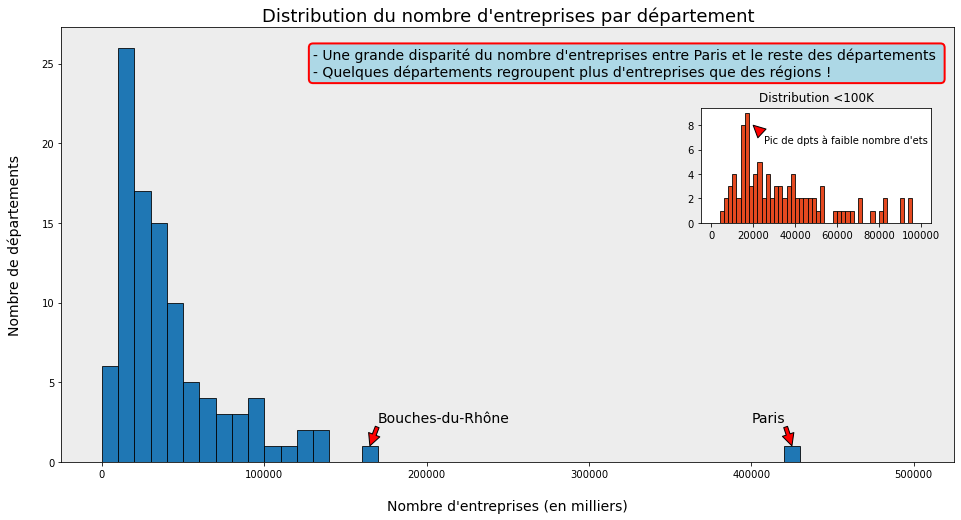

In [29]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.hist(dep_total_ets.Total_ets, range=(0,500000), bins=50, edgecolor='black', linewidth=0.8)
ax.set_ylabel('Nombre de départements', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en milliers)', labelpad=20, fontsize=14)
ax.set_title('Distribution du nombre d\'entreprises par département', fontsize=18)
t = ax.annotate('Paris', xy=(425000, 1), xytext=(400000, 2.5), arrowprops={'facecolor': 'red'}), ax.annotate('Bouches-du-Rhône', xy=(165000, 1), xytext=(170000, 2.5), arrowprops={'facecolor': 'red'})
t2 = ax.text(s='- Une grande disparité du nombre d\'entreprises entre Paris et le reste des départements \n- Quelques départements regroupent plus d\'entreprises que des régions ! ' , x=130000, y=26, ha="left", va="top", size=15, bbox=dict(boxstyle="round,pad=0.3",fc="lightblue", ec="red", lw=2))
plt.setp(t, fontsize=14)
plt.setp(t2, fontsize=14)
ax.grid(visible=False)
ax.set_facecolor('#ededed')

ax2 = plt.axes([0.68, 0.54, 0.2, 0.2])
ax2.hist(dep_total_ets.Total_ets, range=(0,100000), bins=50, edgecolor='black', linewidth=0.8, color='#E54920')
ax2.set_title('Distribution <100K')
t3 = ax2.annotate('Pic de dpts à faible nombre d\'ets', xy=(20000, 8), xytext=(25000, 6.5), arrowprops={'facecolor': 'red'})
plt.show()
